In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [4]:
train.shape

(54808, 14)

In [5]:
train.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [6]:
train.education.value_counts(sort=False)

Master's & above    14925
Below Secondary       805
Bachelor's          36669
Name: education, dtype: int64

In [7]:
print('Missing values percentage in each row:')
for column in train.columns:
    print(column + ': '+str(train[column].isnull().sum()/train.shape[0])+' %')

Missing values percentage in each row:
employee_id: 0.0 %
department: 0.0 %
region: 0.0 %
education: 0.04395343745438622 %
gender: 0.0 %
recruitment_channel: 0.0 %
no_of_trainings: 0.0 %
age: 0.0 %
previous_year_rating: 0.07524448985549555 %
length_of_service: 0.0 %
KPIs_met >80%: 0.0 %
awards_won?: 0.0 %
avg_training_score: 0.0 %
is_promoted: 0.0 %


# LabelEncoding the categoricals

# Department

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
dep_lr = LabelEncoder()

In [10]:
train.department = dep_lr.fit_transform(train.department)

In [11]:
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,7,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,4,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,7,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,7,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,8,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


# Region

In [12]:
reg_lr = LabelEncoder()

In [13]:
train.region = reg_lr.fit_transform(train.region)

In [14]:
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,7,31,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,4,14,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,7,10,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,7,15,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,8,18,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


# Education

In [15]:
edu_lr = LabelEncoder()

Education column has missing values so they have to be filled first

# Filling missing values in education

In [16]:
edu_df = train[['department','region','gender','length_of_service','age','education']]

In [17]:
edu_df.head()

,department,region,gender,length_of_service,age,education
0,7,31,f,8,35,Master's & above
1,4,14,m,4,30,Bachelor's
2,7,10,m,7,34,Bachelor's
3,7,15,m,10,39,Bachelor's
4,8,18,m,2,45,Bachelor's


In [18]:
edu_df.education.value_counts()

Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64

In [19]:
edu_df.groupby(['length_of_service'])['education'].apply(lambda x:x.value_counts().index[0])

length_of_service
1           Bachelor's
2           Bachelor's
3           Bachelor's
4           Bachelor's
5           Bachelor's
6           Bachelor's
7           Bachelor's
8           Bachelor's
9           Bachelor's
10          Bachelor's
11          Bachelor's
12          Bachelor's
13          Bachelor's
14          Bachelor's
15    Master's & above
16    Master's & above
17    Master's & above
18    Master's & above
19    Master's & above
20    Master's & above
21    Master's & above
22          Bachelor's
23    Master's & above
24    Master's & above
25          Bachelor's
26    Master's & above
27          Bachelor's
28          Bachelor's
29    Master's & above
30    Master's & above
31    Master's & above
32    Master's & above
33    Master's & above
34          Bachelor's
37          Bachelor's
Name: education, dtype: object

In [20]:
train['education'] = train['education'].fillna(train.groupby(['age'])['education'].apply(lambda x:x.mode()[0]))

In [21]:
train.isnull().sum()

employee_id                0
department                 0
region                     0
education               2406
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [22]:
train.education = train.education.fillna("Bachelor's")

In [23]:
train.isnull().sum()

employee_id                0
department                 0
region                     0
education                  0
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

# Label Encoding education

In [24]:
train.education = edu_lr.fit_transform(train.education)

In [25]:
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,7,31,2,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,4,14,0,m,other,1,30,5.0,4,0,0,60,0
2,7513,7,10,0,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,7,15,0,m,other,2,39,1.0,10,0,0,50,0
4,48945,8,18,0,m,other,1,45,3.0,2,0,0,73,0


# Gender

In [26]:
gen_lr = LabelEncoder()

In [27]:
train.gender = gen_lr.fit_transform(train.gender)

In [28]:
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,7,31,2,0,sourcing,1,35,5.0,8,1,0,49,0
1,65141,4,14,0,1,other,1,30,5.0,4,0,0,60,0
2,7513,7,10,0,1,sourcing,1,34,3.0,7,0,0,50,0
3,2542,7,15,0,1,other,2,39,1.0,10,0,0,50,0
4,48945,8,18,0,1,other,1,45,3.0,2,0,0,73,0


# recruitment_channel

In [29]:
recChannel_lr = LabelEncoder()

In [30]:
train.recruitment_channel = recChannel_lr.fit_transform(train.recruitment_channel)

In [31]:
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,7,31,2,0,2,1,35,5.0,8,1,0,49,0
1,65141,4,14,0,1,0,1,30,5.0,4,0,0,60,0
2,7513,7,10,0,1,2,1,34,3.0,7,0,0,50,0
3,2542,7,15,0,1,0,2,39,1.0,10,0,0,50,0
4,48945,8,18,0,1,0,1,45,3.0,2,0,0,73,0


# Filling missing values in previous_year_rating

In [32]:
train.dtypes

employee_id               int64
department                int32
region                    int32
education                 int32
gender                    int32
recruitment_channel       int32
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
is_promoted               int64
dtype: object

In [33]:
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,7,31,2,0,2,1,35,5.0,8,1,0,49,0
1,65141,4,14,0,1,0,1,30,5.0,4,0,0,60,0
2,7513,7,10,0,1,2,1,34,3.0,7,0,0,50,0
3,2542,7,15,0,1,0,2,39,1.0,10,0,0,50,0
4,48945,8,18,0,1,0,1,45,3.0,2,0,0,73,0


In [36]:
train.previous_year_rating = train.previous_year_rating.astype('category')

In [38]:
train.dtypes

employee_id                int64
department                 int32
region                     int32
education                  int32
gender                     int32
recruitment_channel        int32
no_of_trainings            int64
age                        int64
previous_year_rating    category
length_of_service          int64
KPIs_met >80%              int64
awards_won?                int64
avg_training_score         int64
is_promoted                int64
dtype: object

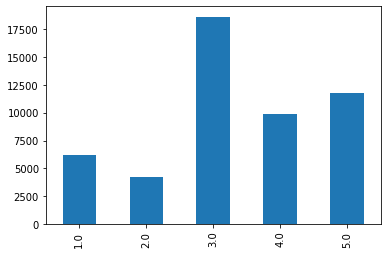

In [43]:
train.previous_year_rating.value_counts(sort=False).plot(kind='bar')

In [57]:
train.groupby(["KPIs_met >80%",'length_of_service'])['previous_year_rating'].agg(lambda x:x.mode()[0])

KPIs_met >80%  length_of_service
0              1                    3.0
               2                    3.0
               3                    3.0
               4                    3.0
               5                    3.0
               6                    3.0
               7                    3.0
               8                    3.0
               9                    3.0
               10                   3.0
               11                   3.0
               12                   3.0
               13                   3.0
               14                   3.0
               15                   3.0
               16                   3.0
               17                   3.0
               18                   3.0
               19                   3.0
               20                   3.0
               21                   3.0
               22                   3.0
               23                   3.0
               24                   3.0
       

In [61]:
train.previous_year_rating = train.previous_year_rating.fillna(train.groupby("KPIs_met >80%")['previous_year_rating'].transform(lambda x:x.mode()[0]))

In [62]:
train.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

In [63]:
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,7,31,2,0,2,1,35,5.0,8,1,0,49,0
1,65141,4,14,0,1,0,1,30,3.0,4,0,0,60,0
2,7513,7,10,0,1,2,1,34,3.0,7,0,0,50,0
3,2542,7,15,0,1,0,2,39,3.0,10,0,0,50,0
4,48945,8,18,0,1,0,1,45,3.0,2,0,0,73,0


In [67]:
train.rename(columns={'KPIs_met >80%':'KPI','awards_won?':'awards_won'},inplace=True)

In [68]:
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPI,awards_won,avg_training_score,is_promoted
0,65438,7,31,2,0,2,1,35,5.0,8,1,0,49,0
1,65141,4,14,0,1,0,1,30,3.0,4,0,0,60,0
2,7513,7,10,0,1,2,1,34,3.0,7,0,0,50,0
3,2542,7,15,0,1,0,2,39,3.0,10,0,0,50,0
4,48945,8,18,0,1,0,1,45,3.0,2,0,0,73,0


# Univariate analysis of continous variables

# AGE

In [69]:
train.age.describe()

count    54808.000000
mean        34.803915
std          7.660169
min         20.000000
25%         29.000000
50%         33.000000
75%         39.000000
max         60.000000
Name: age, dtype: float64

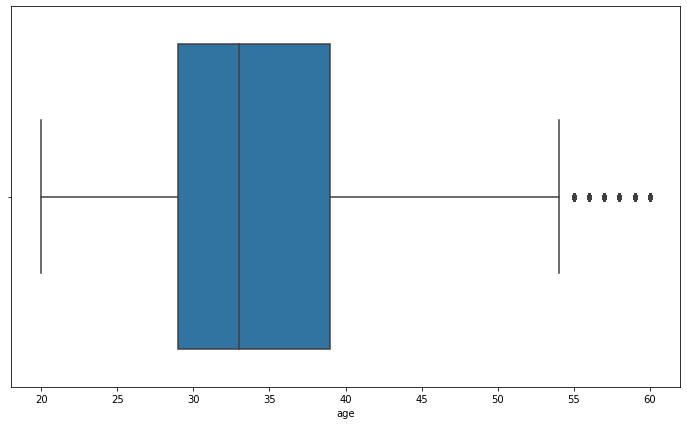

In [71]:
plt.figure(figsize=(12,7))
sns.boxplot(train.age)

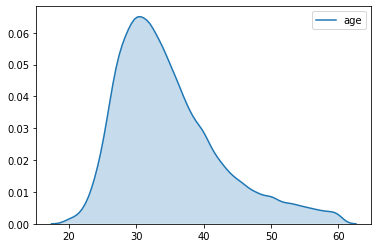

In [72]:
sns.kdeplot(train.age,shade=True)

(array([  870.,  7031., 13751., 12531.,  8300.,  5093.,  2861.,  1908.,
         1322.,  1141.]),
 array([20., 24., 28., 32., 36., 40., 44., 48., 52., 56., 60.]),
 <a list of 10 Patch objects>)

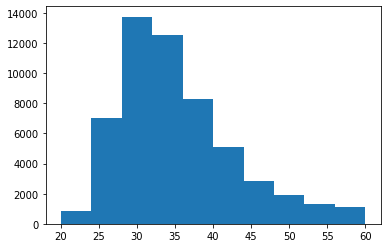

In [80]:
plt.hist(train.age)

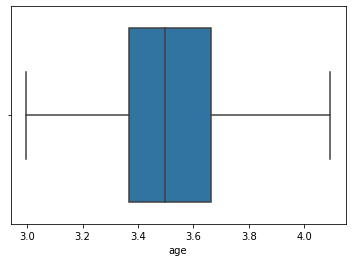

In [84]:
sns.boxplot(np.log(train.age))

Applying log transformation to age

In [85]:
train['age_log'] = np.log(train.age)

In [86]:
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPI,awards_won,avg_training_score,is_promoted,age_log
0,65438,7,31,2,0,2,1,35,5.0,8,1,0,49,0,3.555348
1,65141,4,14,0,1,0,1,30,3.0,4,0,0,60,0,3.401197
2,7513,7,10,0,1,2,1,34,3.0,7,0,0,50,0,3.526361
3,2542,7,15,0,1,0,2,39,3.0,10,0,0,50,0,3.663562
4,48945,8,18,0,1,0,1,45,3.0,2,0,0,73,0,3.806662


# avg_training_score

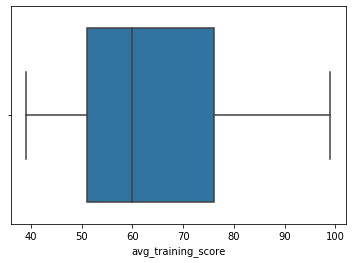

In [87]:
sns.boxplot(train.avg_training_score)

In [88]:
np.median(train.avg_training_score)

60.0

In [89]:
np.mean(train.avg_training_score)

63.38675010947307

In [91]:
train.avg_training_score.min()

39

In [92]:
train.avg_training_score.max()

99

# Uni-Variate analysis on categorical features

In [93]:
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPI,awards_won,avg_training_score,is_promoted,age_log
0,65438,7,31,2,0,2,1,35,5.0,8,1,0,49,0,3.555348
1,65141,4,14,0,1,0,1,30,3.0,4,0,0,60,0,3.401197
2,7513,7,10,0,1,2,1,34,3.0,7,0,0,50,0,3.526361
3,2542,7,15,0,1,0,2,39,3.0,10,0,0,50,0,3.663562
4,48945,8,18,0,1,0,1,45,3.0,2,0,0,73,0,3.806662


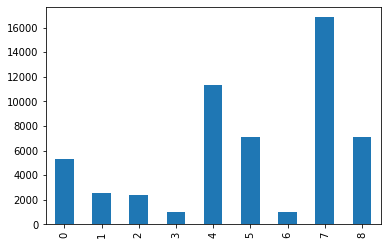

In [95]:
train.department.value_counts(sort=False).plot(kind='bar')